In [1]:
import pandas as pd
import numpy as np
from astropy.constants import u as m_p
from astropy import units as u
from astropy.constants import c,h,k_B, R_sun, L_sun,R_jup, R_earth, sigma_sb, G,M_earth, m_p, sigma_T, M_sun

import matplotlib.pyplot as plt
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D

Part 1

In [2]:
#define given constants
R= 10*u.km
M= 1.5* M_sun
B= (10**12) * (u.erg/(u.cm**3))**(1/2)
a= 30*u.deg
T= (10**(-2))* u.s
w= 2*np.pi/T

In [3]:
#1.a
# calculate power
p = (w**4 *  B**2 * R**6 * (np.sin(a))**2)/(6*c**3)
p.to(u.erg/u.s)

<Quantity 2.41016138e+38 erg / s>

In [4]:
#1.b
#calculate tau
t = (12 * c**3 * M)/(5 * w**2 * B**2 * R**4 * (np.sin(a))**2)
t.decompose()

<Quantity 1.95420794e+12 s>

Part 2

In [5]:
#define given constants
R= (0.001*u.pc).cgs
M= M_sun.cgs

In [6]:
# make array of x,y,z scattering points
#steps: Nnumber of random scattering points to calculate
#returns x,y,z positions in 3 different arrays 
x_arr = []
y_arr = []
z_arr = []

def make_array(steps):   

    for i in range(0,steps):
        theta = np.arccos(np.random.uniform(-1,1))
        phi = np.random.uniform(0,2*np.pi)

        x = np.sin(theta)*np.cos(phi)
        y = np.sin(theta)*np.sin(phi)
        z = np.cos(theta)
        
        x_arr.append(x)
        y_arr.append(y)
        z_arr.append(z)
        
    return x_arr, y_arr, z_arr


In [7]:
# make position arrays for 500 random points
x_arr, y_arr, z_arr = make_array(500)

In [8]:
#define density of the could based on given values
density = M/((4/3) * np.pi* R**3)
#calcualte number density
number_density = density/(m_p.cgs)
#define the l_mfp of the scatter distance
l_mfp = 1/(number_density*(sigma_T.cgs))
l_mfp

<Quantity 1.55614453e+14 cm>

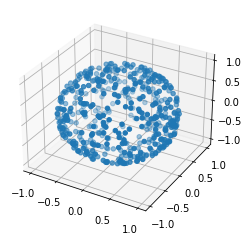

In [9]:
#plot example sphere to show uniform distribution of points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = x_arr
y = y_arr
z = z_arr
ax.scatter(x, y, z)

In [10]:
#creates a random walk of a light path, until it escapes the cloud
#returns x,y,z positions of each scattering point
def make_walk():   
    x_arr = []
    y_arr = []
    z_arr = []

    R= ((0.001*u.pc).cgs).value

    x1=0
    y1=0
    z1=0
    
    dist=0
    
    #repeat until the radial distance of the scattering point is greater than the cloud Radius
    while dist <= R:
        
        #define theta and phi for polar corrdinates 
        theta = np.arccos(np.random.uniform(-1,1))
        phi = np.random.uniform(0,2*np.pi)

        #define x,y,z in polar corrdinates    
        x = np.sin(theta)*np.cos(phi)* l_mfp.value
        y = np.sin(theta)*np.sin(phi)* l_mfp.value
        z = np.cos(theta) * l_mfp.value
        
        x2 = x1 + x
        y2 = y1 + y
        z2 = z1 + z
        
        x_arr.append(x2)
        y_arr.append(y2)
        z_arr.append(z2)
        
        x1=x2
        y1=y2
        z1=z2
        
        #calcualte distance from scatter point to origin 
        dist = np.sqrt(x2**2 + y2**2 + z2**2)
        
    return x_arr, y_arr, z_arr

In [11]:
x_arr, y_arr, z_arr = make_walk()

In [12]:
len(y_arr)

668

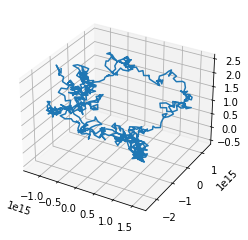

In [13]:
#plot a single random walk
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = x_arr
y = y_arr
z = z_arr
ax.plot(x, y, z)

In [14]:
#create random walks for multiple simulations 

x_all_arr = []
y_all_arr = []
z_all_arr = []

n_sim = 1000
for i in range(n_sim):
    x_arr, y_arr, z_arr = make_walk()
    
    x_all_arr.append(x_arr)
    y_all_arr.append(y_arr)
    z_all_arr.append(z_arr)
    

In [15]:
#calculate total path distance
#x_all_arr : x positions of all scatters 
#y_all_arr : y positions of all scatters
#z_all_arr : z positions of all scatters
#returns the total path of each simulation

total_path_arr = []

def total_path(x_all_arr,y_all_arr,z_all_arr):
    
    #loop through each simulations 
    for i in range(len(x_all_arr)):  
        x = x_all_arr[i]
        y = y_all_arr[i]
        z = z_all_arr[i]
        
        dist_total = 0
        
        #loop through all positions for one simulation
        for j in range(len(x)-1):
            x1 = x[j]
            x2 = x[j+1]

            y1 = y[j]
            y2 = y[j+1]

            z1 = z[j]
            z2 = z[j+1]

            dist = np.sqrt((x2-x1)**2 + (y2-y1)**2 + (z2-z1)**2)
            dist_total += dist
            
        total_path_arr.append(dist_total)
    
    return total_path_arr
    
    

In [16]:
total_path_arr = total_path(x_all_arr,y_all_arr,z_all_arr)

<ipython-input-62-a0973455bf2f>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


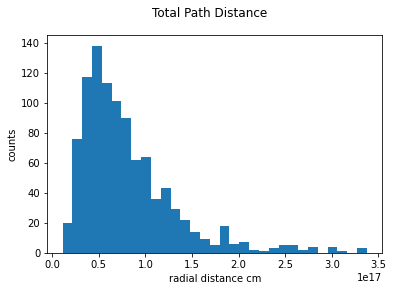

In [62]:
#plot the distribution of total path distance
fig = plt.figure()
ax = fig.add_subplot(111)
fig.suptitle('Total Path Distance')

bins_int = int(np.sqrt(len(total_path_arr)))

ax.hist(total_path_arr, bins = bins_int)
ax.set_xlabel("radial distance cm")
ax.set_ylabel("counts")
fig.show()

In [68]:
l_mfp

<Quantity 1.55614453e+14 cm>

In [18]:
#calcualte the number of scatter points per volume shell of the cloud, 
                                            #radius of each scatter, and the radius of each shell
#R : Radius of cloud
#num_shells : numbe of shells within the cloud
#x_all_arr : x positions of all scatters
#y_all_arr : y positions of all scatters
#z_all_arr : z positions of all scatters
# returns -
#shell_count_density_per_sim : nested array of the scatters/volume for each shell of each simulation
#shell_radii_arr : array of each shell radius (same for each simulation)
#r_last_arr : array of the last scatter point (inside the cloud Radius) for each simulation

def shell_volume(R,num_shells, x_all_arr,y_all_arr,z_all_arr):
    
    #radial difference of shell
    dr= R/num_shells
    
    shell_count_density_per_sim = []
    shell_radii_arr_per_sim =[]
    r_last_arr = []
    
    #loop through each simulation
    for i in range(len(x_all_arr)):
        
        x_arr = x_all_arr[i]
        y_arr = y_all_arr[i]
        z_arr = z_all_arr[i]

        r_arr = []
        #loop through all points in one simulation 
        for j in range(len(x_arr)):
            
            x = x_arr[j]
            y = y_arr[j]
            z = z_arr[j]
            
            #alculate radial distance for each scatter point
            r = np.sqrt((x)**2 + (y)**2 + (z)**2)
            r_arr.append(r)
            
        r_arr.sort()
        
        #find last scatter point and add to list
        r_last = r_arr[-2]
        r_last_arr.append(r_last)
        
        
        shell_count_density_arr_per_shell = []

        #define starting shell radius 
        r1=dr.value
        r2=2*dr.value

        shell_radii_arr = []
        #loop through array of scatter point and count how many scatters per shell
        while r2 < R.value:
            
            #find how many scatters are in this shell
            ind = np.where((r1<r_arr) & (r_arr<r2))
            shell_counts = len(ind[0])

            v_shell = 4*np.pi*r1**2 * dr.value

            shell_count_density = shell_counts/v_shell
            shell_count_density_arr_per_shell.append(shell_count_density)

            shell_radii_arr.append(r2)

            r1 += dr.value
            r2 += dr.value

            
        shell_count_density_per_sim.append(shell_count_density_arr_per_shell)
        shell_radii_arr_per_sim.append(shell_radii_arr)



    return shell_count_density_per_sim, shell_radii_arr, r_last_arr




In [24]:
num_shells = 150
shell_count_density_all, shell_radii_arr, r_last_arr = shell_volume(R,num_shells, x_all_arr,y_all_arr,z_all_arr)

In [25]:
len(shell_count_density_all[0])

149

In [26]:
# average shell count densities for all simulations
density = np.array(shell_count_density_all)
sum_densities = np.zeros(num_shells-1)

#loop through each simulation and count total scatters per shell
for i in range(len(density)):
    sum_densities += density[i]

#average the densities by the number of simulations
avg_densities = sum_densities/len(density)

In [27]:
len(density[0])

149

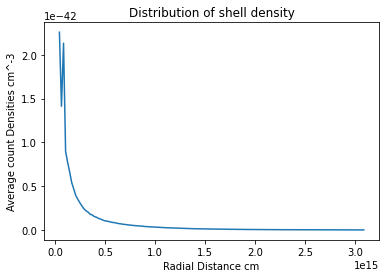

In [64]:
#Plot the distribution of shell density

plt.plot(shell_radii_arr, avg_densities)
plt.title("Distribution of shell density")
plt.xlabel("Radial Distance cm")
plt.ylabel("Average count Densities cm^-3")
plt.show()

<ipython-input-29-63af14f0de92>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


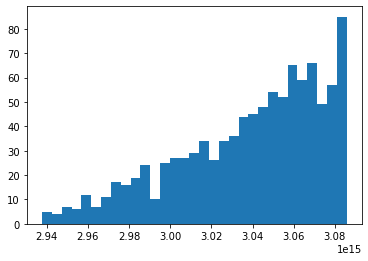

In [29]:
# Plot radial distribution of last scatter

fig = plt.figure()
ax = fig.add_subplot(111)
fig.suptitle("Radial Distribution of Last Scatter")

bins_int = int(np.sqrt(len(r_last_arr)))

ax.hist(r_last_arr, bins = bins_int)
ax.set_xlabel("Radial Distance cm")
ax.set_ylabel("Counts")

fig.show()

In [69]:
l_mfp

<Quantity 1.55614453e+14 cm>

Bonus Question

In [ ]:
# now, l_mfp varies with R

In [43]:
#same density from first part 
density = M/((4/3) * np.pi* R**3)
number_density = density/(m_p.cgs)


In [44]:
#calcualte l_mfp for the relevent radial distance 
# r : radius of scattering point
#returns l_mfp art given radius 
def l_func(r):
    
    N = (M/m_p.cgs).value
    n = ( (N * np.e) / (4 * np.pi * R**3 * (2*np.e-5)) ) * np.e**(-r/R.value)
    
    l_mfp = 1/(sigma_T.cgs * n)
    
    return l_mfp.value

In [45]:
N = (M/m_p.cgs).value
N

1.1887981632522106e+57

In [46]:
#creates a random walk of a light path, until it escapes the cloud
#same function as defined above, but the l_mfp is updated to the r dependance 
#returns x,y,z positions of each scattering point
def make_walk():   
    x_arr = []
    y_arr = []
    z_arr = []

    R= ((0.001*u.pc).cgs).value

    x1=0
    y1=0
    z1=0
    
    dist=0
    
    #repeat until the radial distance of the scattering point is greater than the cloud Radius
    while dist <= R:
        
        theta = np.arccos(np.random.uniform(-1,1))
        phi = np.random.uniform(0,2*np.pi)
        
        #define x,y,z in polar corrdinates 
        x = np.sin(theta)*np.cos(phi)* l_func(dist)
        y = np.sin(theta)*np.sin(phi)* l_func(dist)
        z = np.cos(theta) * l_func(dist)
        
        x2 = x1 + x
        y2 = y1 + y
        z2 = z1 + z
        
        x_arr.append(x2)
        y_arr.append(y2)
        z_arr.append(z2)
        
        x1=x2
        y1=y2
        z1=z2
        
        #calculate distance at each scatter point 
        dist = np.sqrt(x2**2 + y2**2 + z2**2)
        
    return x_arr, y_arr, z_arr

In [47]:
x_arr, y_arr, z_arr = make_walk()

In [48]:
len(x_arr)

190

In [39]:
x_all_arr = []
y_all_arr = []
z_all_arr = []

n_sim = 1000

#calcualte x,y,z point for each simulation
for i in range(n_sim):
    x_arr, y_arr, z_arr = make_walk()
    
    x_all_arr.append(x_arr)
    y_all_arr.append(y_arr)
    z_all_arr.append(z_arr)

In [40]:
len(x_arr)

583

In [49]:
#calculate total path distance
#same funciton as above
#x_all_arr : x positions of all scatters 
#y_all_arr : y positions of all scatters
#z_all_arr : z positions of all scatters
#returns the total path of each simulation

total_path_arr = []

def total_path(x_all_arr,y_all_arr,z_all_arr):
    
    #loop through each simulations 
    for i in range(len(x_all_arr)):  
        x = x_all_arr[i]
        y = y_all_arr[i]
        z = z_all_arr[i]
        
        dist_total = 0
        
        #loop through all positions for one simulation
        for j in range(len(x)-1):
            x1 = x[j]
            x2 = x[j+1]

            y1 = y[j]
            y2 = y[j+1]

            z1 = z[j]
            z2 = z[j+1]

            dist = np.sqrt((x2-x1)**2 + (y2-y1)**2 + (z2-z1)**2)
            dist_total += dist
            
        total_path_arr.append(dist_total)
    
    return total_path_arr

In [50]:
total_path_arr = total_path(x_all_arr,y_all_arr,z_all_arr)

In [51]:
len(x_all_arr[0])

420

<ipython-input-66-00d22f7d3c37>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


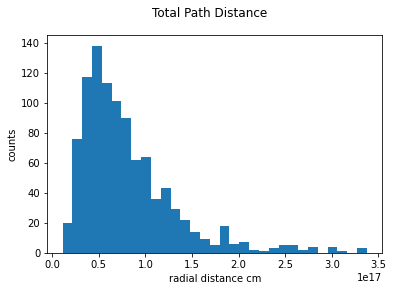

In [66]:
#Plot the distribution of total path distance
fig = plt.figure()
ax = fig.add_subplot(111)

bins_int = int(np.sqrt(len(total_path_arr)))

ax.hist(total_path_arr, bins = bins_int)
fig.suptitle('Total Path Distance')
ax.set_xlabel("radial distance cm")
ax.set_ylabel("counts")
fig.show()

In [53]:
len(total_path_arr)

1000

In [54]:
#calcualte the number of scatter points per volume shell of the cloud, 
                                            #radius of each scatter, and the radius of each shell
#R : Radius of cloud
#num_shells : numbe of shells within the cloud
#x_all_arr : x positions of all scatters
#y_all_arr : y positions of all scatters
#z_all_arr : z positions of all scatters
# returns -
#shell_count_density_per_sim : nested array of the scatters/volume for each shell of each simulation
#shell_radii_arr : array of each shell radius (same for each simulation)
#r_last_arr : array of the last scatter point (inside the cloud Radius) for each simulation

def shell_volume(R,num_shells, x_all_arr,y_all_arr,z_all_arr):
    
    #radial difference of shell
    dr= R/num_shells
    
    shell_count_density_per_sim = []
    shell_radii_arr_per_sim =[]
    r_last_arr = []
    
    #loop through each simulation
    for i in range(len(x_all_arr)):
        
        x_arr = x_all_arr[i]
        y_arr = y_all_arr[i]
        z_arr = z_all_arr[i]

        r_arr = []
        #loop through all points in one simulation 
        for j in range(len(x_arr)):
            
            x = x_arr[j]
            y = y_arr[j]
            z = z_arr[j]
            
            #alculate radial distance for each scatter point
            r = np.sqrt((x)**2 + (y)**2 + (z)**2)
            r_arr.append(r)
            
        r_arr.sort()
        
        #find last scatter point and add to list
        r_last = r_arr[-2]
        r_last_arr.append(r_last)
        
        
        shell_count_density_arr_per_shell = []

        #define starting shell radius 
        r1=dr.value
        r2=2*dr.value

        shell_radii_arr = []
        #loop through array of scatter point and count how many scatters per shell
        while r2 < R.value:
            
            #find how many scatters are in this shell
            ind = np.where((r1<r_arr) & (r_arr<r2))
            shell_counts = len(ind[0])

            v_shell = 4*np.pi*r1**2 * dr.value

            shell_count_density = shell_counts/v_shell
            shell_count_density_arr_per_shell.append(shell_count_density)

            shell_radii_arr.append(r2)

            r1 += dr.value
            r2 += dr.value

            
        shell_count_density_per_sim.append(shell_count_density_arr_per_shell)
        shell_radii_arr_per_sim.append(shell_radii_arr)



    return shell_count_density_per_sim, shell_radii_arr, r_last_arr

 

In [55]:
num_shells = 150
shell_count_density_all, shell_radii_arr, r_last_arr = shell_volume(R,num_shells, x_all_arr,y_all_arr,z_all_arr)

# average all simulations
density = np.array(shell_count_density_all)
sum_densities = np.zeros(num_shells-1)
for i in range(len(density)):
    sum_densities += density[i]
    
avg_densities = sum_densities/len(density)

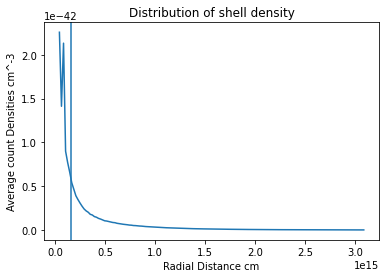

In [67]:

#plot the distribution of shell density

plt.plot(shell_radii_arr, avg_densities)
plt.axvline(l_mfp.value)
plt.title("Distribution of shell density")
plt.xlabel("Radial Distance cm")
plt.ylabel("Average count Densities cm^-3")
plt.show()

<ipython-input-65-7e7cd1d4a77f>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


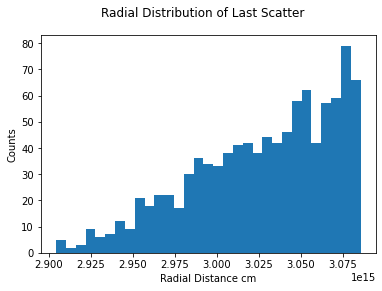

In [65]:
# radial distribution of last scatter

fig = plt.figure()
ax = fig.add_subplot(111)

bins_int = int(np.sqrt(len(r_last_arr)))

ax.hist(r_last_arr, bins = bins_int)
fig.suptitle("Radial Distribution of Last Scatter")
ax.set_xlabel("Radial Distance cm")
ax.set_ylabel("Counts")
fig.show()